In [1]:
import os
from PIL import Image, ImageOps
import PIL
import matplotlib.pyplot as plt
import numpy as np

import torch
from torchvision import datasets, transforms

import torchvision.transforms as transforms
from PIL import Image, ImageOps

import random

from IPython.display import FileLink, FileLinks

In deze notebook gaan we de verschillende methodes voor het aanpassen van de afbeeldingen en waarom je dit zou doen.

We beginnen met een afbeeldinging

In [2]:
folder_path = "complete_dataset\\apple"

In [3]:
file_name = "Image_43.jpg"

In [4]:
image_path = os.path.join(folder_path, file_name)

In [5]:
image = Image.open(image_path)

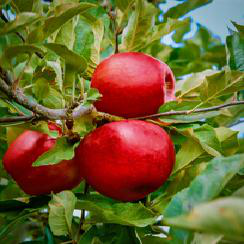

In [6]:
# Convert image to numpy array
image_rgb = image.convert("RGB")
image_rgb

In [7]:
# # Nu niet nodig
# width, height = image.size

# # Create figure and axis
# fig, ax = plt.subplots(1)
# ax.imshow(image_rgb)

Hier kunnen we meerdere dingen mee doen:
- (lijst met opties)

#### Normaliseren
Dit is het schalen van afbeeldingen naar een bereik tussen de 0 en 1 of -1 en 1. Als de waardes (bij een rgb) tussen de 0-255 liggen kan je simpelweg elke pixelwaarde delen door 255.

In [8]:
image_np = np.array(image_rgb)
image_np[:1]

array([[[ 69,  72,   0],
        [ 57,  68,   0],
        [ 40,  62,  15],
        [ 48,  71,  27],
        [ 57,  70,   0],
        [ 64,  66,   0],
        [ 88,  84,   0],
        [ 96,  99,   0],
        [ 90, 102,  38],
        [ 96, 114,  74],
        [ 91, 104,  58],
        [100, 102,  27],
        [ 72,  67,   0],
        [ 66,  63,   0],
        [ 42,  50,   9],
        [ 41,  58,  48],
        [ 54,  65,   0],
        [ 50,  61,   0],
        [ 55,  66,   0],
        [ 66,  79,  10],
        [ 67,  82,  13],
        [ 58,  75,   5],
        [ 56,  73,   3],
        [ 60,  80,   9],
        [ 55,  75,   6],
        [ 60,  77,   9],
        [ 63,  80,  12],
        [ 64,  79,  12],
        [ 62,  74,   8],
        [ 61,  72,   6],
        [ 61,  72,   6],
        [ 62,  73,   7],
        [ 64,  62,  11],
        [ 81,  81,  19],
        [ 91,  96,  16],
        [ 75,  87,   0],
        [ 79,  97,   0],
        [ 96, 118,   7],
        [103, 127,  31],
        [119, 144,  76],


In [9]:
normalised_img = image_np / 255
normalised_img[:1]

array([[[0.27058824, 0.28235294, 0.        ],
        [0.22352941, 0.26666667, 0.        ],
        [0.15686275, 0.24313725, 0.05882353],
        [0.18823529, 0.27843137, 0.10588235],
        [0.22352941, 0.2745098 , 0.        ],
        [0.25098039, 0.25882353, 0.        ],
        [0.34509804, 0.32941176, 0.        ],
        [0.37647059, 0.38823529, 0.        ],
        [0.35294118, 0.4       , 0.14901961],
        [0.37647059, 0.44705882, 0.29019608],
        [0.35686275, 0.40784314, 0.22745098],
        [0.39215686, 0.4       , 0.10588235],
        [0.28235294, 0.2627451 , 0.        ],
        [0.25882353, 0.24705882, 0.        ],
        [0.16470588, 0.19607843, 0.03529412],
        [0.16078431, 0.22745098, 0.18823529],
        [0.21176471, 0.25490196, 0.        ],
        [0.19607843, 0.23921569, 0.        ],
        [0.21568627, 0.25882353, 0.        ],
        [0.25882353, 0.30980392, 0.03921569],
        [0.2627451 , 0.32156863, 0.05098039],
        [0.22745098, 0.29411765, 0

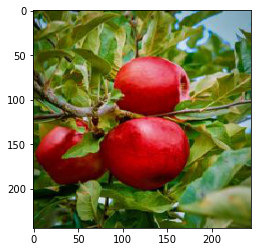

In [10]:
plt.imshow(normalised_img)

Ondanks dat de waardes anders zijn is het nog niet aan de afbeelding te zien.

### Sampling

In [4]:
FileLink("over-under sampling.ipynb")

E:\Studie\Stage\Computer-Vision-Showcase-SUPERP\code\over-under sampling.ipynb

#### Data Augmentatie
Door het toepassen van een augmentatie kan je meer data verkreigen of beter voorbereid zijn op nieuwe input. 
Dit kan je doen door: Rotatie, spiegelen (Flipping), schuine transformatie(Shearing), in- of uitzoemen (Zooming) of helderheid en contrast veranderen (Brightness/Contrast Adjustment)

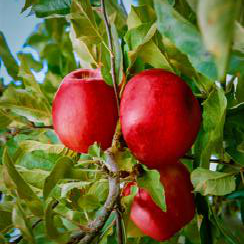

In [11]:
# Het roteren van een afbeelding is erg simpel
rotated_img = image.rotate(90, PIL.Image.NEAREST, expand = 1)
rotated_img

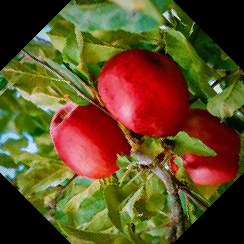

In [12]:
rotated_img = rotated_img.rotate(45, PIL.Image.NEAREST, expand = 0)
rotated_img

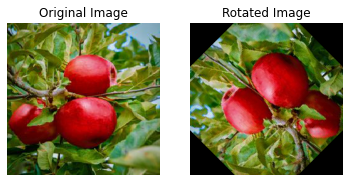

In [13]:
# Maak de subplots
f, ax = plt.subplots(1, 2)

# Plot de eerste afbeelding
ax[0].imshow(image_rgb)
ax[0].set_title('Original Image')  # Optioneel: Voeg een titel toe
ax[0].axis('off')  # Optioneel: Verwijder de assen

# Plot de tweede afbeelding
ax[1].imshow(rotated_img)
ax[1].set_title('Rotated Image')  # Optioneel: Voeg een titel toe
ax[1].axis('off')  # Optioneel: Verwijder de assen

# Toon de afbeeldingen
plt.show()

In [15]:
def show_images(images):
    # images => [(image0, "image_name0"), (image1, "image_name1"), ...] 
# # OLD WERKT NIET
#         if len(images) % 2 == 0:
#             print(len(images) % 2)
#             f, ax = plt.subplots(int(len(images)/2), 2)
#             for i, duo in enumerate(images):
#                 if i > len(images)/2:
#                     as1 = 0
#                 else:
#                     as1 = 1
#                 # duo[0] = image, duo[1] = titleName
#                 ax[as1][i-1].imshow(duo[0])
#                 if duo[1]:
#                     ax[as1][i-1].set_title(duo[1])
#                 ax[as1][i-1].axis('off')  # Optioneel: Verwijder de assen
        else:
            pass # Dit werkt nog niet
    else:
        # Maak de subplots
        f, ax = plt.subplots(1, len(images))
    for i, duo in enumerate(images):
        # duo[0] = image, duo[1] = titleName
        ax[i].imshow(duo[0])
        if duo[1]:
            ax[i].set_title(duo[1])
        ax[i].axis('off')  # Optioneel: Verwijder de assen
    # Toon de afbeeldingen
    plt.show()

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 19)

In [ ]:
images = [(image_rgb, 'Original Image'), (rotated_img, 'Rotated Image')]
show_images(images)

Deze functie zullen we vanaf nu gebruiken om meerdere afbeeldingen te weergeven

In [ ]:
# flip clockwise 
flip_clock_img= image_rgb.transpose(Image.TRANSVERSE)

# flip anti-clockwise
flip_anti_img = image_rgb.transpose(Image.TRANSPOSE)

# flip horizontal
flip_horizon_img = image_rgb.transpose(Image.FLIP_LEFT_RIGHT)

In [ ]:
images0 = [(image_rgb, 'Original Image'), (flip_horizon_img, 'Horizontal')]
images1 = [(flip_anti_img, 'Anti-clockwise'), (flip_clock_img, 'Clockwise')]
show_images(images0)
show_images(images1)

Shearing

In [ ]:
# Definieer de shearing parameters (in dit geval langs de x-as en y-as)
shear_factor_x = 0.2  # Verandering langs de x-as
shear_factor_y = 0.1  # Verandering langs de y-as

In [ ]:
# Verkrijg de breedte en hoogte van de afbeelding
width, height = image.size

# Maak de shearing matrix voor de affine transformatie
shear_matrix = (1, shear_factor_x, 0, shear_factor_y, 1, 0)

# Pas de affine transformatie toe op de afbeelding
sheared_image = image.transform((width, height), Image.AFFINE, shear_matrix)

In [ ]:
images = [(image, 'Original Image'), (sheared_image, 'Sheared Image')]
show_images(images)

In [ ]:
# Zooming - mis niet

In [ ]:
# Brightness/Contrast Adjustment

In [ ]:
## Padding (idk of het nodig is)

#### Kleurkanalen aanpassen

In [ ]:
# Grayscale

In [ ]:
img_equalized = ImageOps.equalize(image)
img_equalized

In [ ]:
img_gray = ImageOps.grayscale(image) 
img_gray

In [ ]:
gray_equalized = ImageOps.equalize(img_gray)
gray_equalized

In [ ]:
images0 = [(image_rgb, 'Original Image'), (img_gray, 'Grayscale Image')]
images1 = [(img_equalized, 'Equalized Image'), (gray_equalized, 'Grayscale Equalized Image')]
show_images(images0)
show_images(images1)

Note dat bij het plotten het een grayscale is (dus de 3 stromen naar 1 gezet) deze wordt erkend als groen (de eerste stroom)

Normalisatie van kleurkanalen **Dit is de methode die we ook met de standaard mendix prepocessing doen**

In [ ]:
# Definieer de gemiddelde en standaardafwijking voor de RGB-kanalen
mean = [0.485, 0.456, 0.406]  # Vooraf gedefinieerde waarden die vaak worden gebruikt voor ImageNet-pretraining
std = [0.229, 0.224, 0.225]   # Standaardafwijking voor de RGB-kanalen

# Definieer de transformaties, inclusief normalisatie
transform = transforms.Compose([
    transforms.ToTensor(),  # Zet de afbeelding om naar een tensor met waarden in [0, 1]
    transforms.Normalize(mean=mean, std=std)  # Normaliseer met de gemiddelde en standaardafwijking
])

# Pas de transformatie toe op de afbeelding
image_tensor = transform(image)

print(image_tensor)

In [ ]:
img = image_np

In [ ]:
img[:, :, 0] = (img[:, :, 0] - np.mean(img[:, :, 0])) / np.std(img[:, :, 0])  # R-kanaal
img[:, :, 1] = (img[:, :, 1] - np.mean(img[:, :, 1])) / np.std(img[:, :, 1])  # G-kanaal
img[:, :, 2] = (img[:, :, 2] - np.mean(img[:, :, 2])) / np.std(img[:, :, 2])  # B-kanaal

# Zet het terug naar een afbeelding
image_normalized = Image.fromarray(np.uint8(image))

# Toon of sla de afbeelding op
image_normalized.show()

In [ ]:
images = [(image_rgb, 'Original Image'), (image_normalized, 'Kanalen Normaliseerd')]
show_images(images)

### Toevoeging
Kijk naar [U2 image segmentation](https://learnopencv.com/u2-net-image-segmentation/) Voor het weghalen/ toevoegen van achtergronden.

*Toevoegen verschil resize crop vs resize*

In [3]:
class SquarePad:
    def __call__(self, image):
        # Voeg padding toe om de afbeelding vierkant te maken
        max_size = max(image.size)
        pad_x = (max_size - image.size[0]) // 2
        pad_y = (max_size - image.size[1]) // 2
        padding = (pad_x, pad_y, max_size - image.size[0] - pad_x, max_size - image.size[1] - pad_y)
        return ImageOps.expand(image, padding, fill=0)  # Vul de padding met zwarte rand

In [33]:
class ResizeWithRotation:
    def __init__(self, size, rotate_angle):
        self.size = size
        self.rotate_angle = rotate_angle

    def __call__(self, image):
        # Roteer de afbeelding
        rotated_image = image.rotate(self.rotate_angle, expand=True, fillcolor=(0, 0, 0))

        # Voeg vierkante padding toe
        padded_image = SquarePad()(rotated_image)

        # Verander van grootte zonder te croppen
        return padded_image.resize((self.size, self.size), resample=Image.Resampling.LANCZOS)

In [5]:
class ResizeWithRandomRotation:
    def __init__(self, size, max_rotate_angle):
        self.size = size
        self.max_rotate_angle = max_rotate_angle

    def __call__(self, image):
        # Genereer een willekeurige rotatiehoek tussen 0 en max_rotate_angle
        random_angle = random.uniform(0, self.max_rotate_angle)

        # Roteer de afbeelding met de willekeurige hoek
        rotated_image = image.rotate(random_angle, expand=True, fillcolor=(0, 0, 0))

        # Voeg vierkante padding toe
        padded_image = SquarePad()(rotated_image)

        # Verander van grootte zonder te croppen
        return padded_image.resize((self.size, self.size), resample=Image.Resampling.LANCZOS)

In [15]:
transform = transforms.Compose([
    # ResizeWithRotation(224, 45),  # Bijvoorbeeld een rotatie van 45 graden en daarna aanpassen naar 224x224
    ResizeWithRandomRotation(224, 180),
])

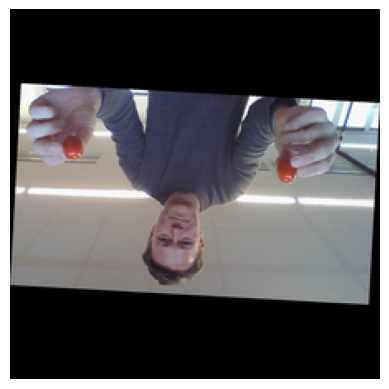

In [27]:
test_image = Image.open('E:\\Studie\\Stage\\Data\\ResNet50_v1.0\\Tomaat\\WIN_20241211_12_59_04_Pro.jpg')
transformed_image = transform(test_image)
# transformed_image.show()

# Gebruik matplotlib om de afbeelding weer te geven
plt.imshow(transformed_image)
plt.axis('off')  # Optioneel: verberg de assen
plt.show()